Error for step size 0.25 at t=3 is 129.74633789062491
Error for step size 0.2 at t=3 is 1.0000000000000935
Error for step size 0.15 at t=3 is 9.536742228300203e-07
Error for step size 0.01 at t=3 is 7.48369526495538e-14
y at t=3 is 9.357622968840175e-14


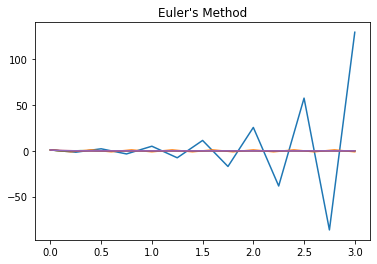

In [6]:
# Solution for 1st part of Question 1

import math
import numpy as np
import matplotlib.pyplot as plt

# This code is only a slight modification of the in class exercise
# We only need to adjust the math functions, ending value for t and step sizes

def f(t, y):
    return -10*y

def y(t):
    return np.exp(-10*t)

def Euler(f, t, Δt, y_t_min):
    Nt = len(t)
    ys = np.zeros(Nt)
    ys[0] = y_t_min
    for i in range(1, Nt):
        ys[i] = ys[i-1] + Δt * f(ts[i-1], ys[i-1])
    return ys

t_min = 0.; t_max = 3.; y_0 = 1

y_t_max = y(t_max)
t_Euler = {}
y_Euler = {}
errors = {}
for Δt in [0.25, 0.2, 0.15, 0.01]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)
    ys = Euler(f, ts, Δt, y_0)
    t_Euler[Δt] = ts
    y_Euler[Δt] = ys

for Δt in reversed(sorted(t_Euler)):
    ys = y_Euler[Δt]
    plt.plot(t_Euler[Δt], ys)
    errors[Δt] = math.fabs(ys[-1] - y_t_max)
plt.title("Euler's Method")

for Δt in reversed(sorted(errors)):
    print("Error for step size", Δt, "at t=3 is", errors[Δt])

# plot the actual solution
t = np.linspace(t_min, t_max, 100)
y = y(t)
plt.plot(t,y);
print('y at t=3 is', y_t_max)

Error for step size 0.25 at t=3 is 2.959261407774707e-07
Error for step size 0.2 at t=3 is 6.969162580002664e-08
Error for step size 0.15 at t=3 is 1.0995022701530313e-08
Error for step size 0.01 at t=3 is 2.885390925079692e-13


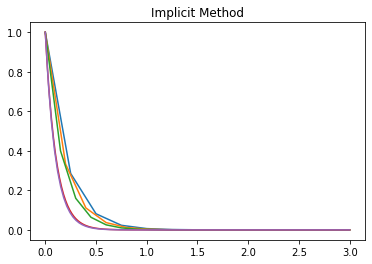

In [7]:
# Solution for 2nd part of question 1

import math
import numpy as np
import matplotlib.pyplot as plt

# The key modification here is in the Euler function iteration

def y(t):
    return np.exp(-10*t)

def Implicit(t, Δt, f_t_min):
    Nt = len(t)
    ys = np.zeros(Nt)
    ys[0] = f_t_min
    for i in range(1, Nt):
        ys[i] = ys[i-1]/(1+10*Δt)
    return ys

t_min = 0.; t_max = 3.; y_0 = 1.

y_t_max = y(t_max)
t_Implicit = {}
y_Implicit = {}
errors = {}
for Δt in [0.25, 0.2, 0.15, 0.01]:
    ts = np.linspace(t_min, t_max, int((t_max - t_min) / Δt) + 1)
    ys = Implicit(ts, Δt, y_0)
    t_Implicit[Δt] = ts
    y_Implicit[Δt] = ys

for Δt in reversed(sorted(t_Implicit)):
    ys = y_Implicit[Δt]
    plt.plot(t_Implicit[Δt], ys)
    errors[Δt] = math.fabs(ys[-1] - y_t_max)
plt.title("Implicit Method")

for Δt in reversed(sorted(errors)):
    print("Error for step size", Δt, "at t=3 is", errors[Δt])

# plot the actual solution
t = np.linspace(t_min, t_max, 100)
y = y(t)
plt.plot(t,y);

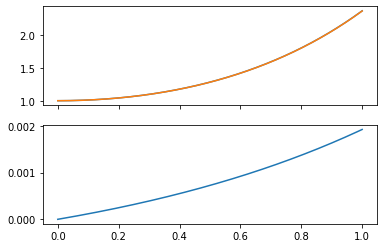

In [3]:
# Solution for Question 2

import numpy as np
import matplotlib.pyplot as plt
from math import e
import timeit

# No change is required to the LUSolve function

def LUSolve(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2):
    N = int((b-a)/Δx) + 1
    xs = np.linspace(a, b, N)
    
    # Set up matrix diagonals
    d0 = f1(xs) - 2.*f3(xs)/(Δx**2)
    d1 = f2(xs[0:-1])/(2.*Δx) + f3(xs[0:-1])/(Δx**2)
    dm1 = -f2(xs[1:])/(2.*Δx) + f3(xs[1:])/(Δx**2)
    
    # First Boundary Condition
    d0[0] = g1 - g2/Δx
    d1[0] = g2/Δx
    
    # Second Boundary Condition
    d0[-1] = k2/Δx
    dm1[-1] = k1 - k2/Δx

    # Perform LU Decomposition
    for i in range(1,len(d0)):
        dm1[i-1] = dm1[i-1] / d0[i-1]
        d0[i] = d0[i] - dm1[i-1]*d1[i-1]

    # Construct the RHS of the equation Ay = z which we will solve for y
    z = f0(xs)
    z[0] = g0
    z[-1] = k0

    # Solving for y using forward substitution
    y = list(z)
    for i in range(len(y)-1):
        y[i+1] = z[i+1] - y[i]*dm1[i]
        
    # Solving for x using backward substitution
    x =  y[:] / d0[-1]
    for i in range(len(x)-1):
        x[-i-2] = (y[-i-2] - x[-i-1]*d1[-i-1]) / d0[-i-2]

    return x

# The functions f1,f2,f3 are simply constants 
# However, they must be returned in a form that works with the function

def f0(x):
    return x*np.exp(x)-2*x+2
    
def f1(x):
    return np.zeros(len(x))

def f2(x):
    return -np.ones(len(x))

def f3(x):
    return np.ones(len(x))

a = 0.; b = 1.                  # x-axis boundary values
g1 = 1.; g2 = 0.; g0 = 1.       # Left boundary condition
k1 = 0.; k2 = 1.; k0 = 2+0.5*e  # Right boundary condition
Δx = 0.001

# generate estimated solution, subtract actual solution and plot error
y_estd = LUSolve(Δx, a, b, f0, f1, f2, f3, g0, g1, g2, k0, k1, k2)
xs = np.linspace(0,1,int(1/Δx)+1)
def f(x):
    return (1 + 0.5*x**2 - x)*np.exp(x) + x**2
y_actual = f(xs)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(xs, y_estd, xs, y_actual)
ax2.plot(xs,y_estd - y_actual)